In [1]:
from PIL import Image
from tqdm.auto import tqdm
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
from time import sleep

DATA_ROOT = "/data1/Raw/Reddit/full/EarthPorn"
OUTPUT_ROOT = "/data2/goghgetpaper/imgs/"

In [2]:
path = pathlib.Path(DATA_ROOT)
files = list(path.glob('**/*.*'))
print(len(files))

146999


In [2]:
path = pathlib.Path(OUTPUT_ROOT)
files = list(path.glob('**/*.jpg'))
print(len(files))

33441349


In [19]:
def break64(file):
    with Image.open(file).convert('RGB') as im:
        width, height = im.size
        images = []

        cols = width//64
        rows = height//64

        for j in range(rows):
            for i in range(cols):
                left = i*64
                top = j*64
                right = (i+1)*64
                bottom = (j+1)*64
                images.append(im.crop((left, top, right, bottom))) 
        return images, rows, cols

def displayImage(file, imgs):
    im = Image.open(file).convert('RGB')
    width, height = im.size
    cols = width//64
    rows = height//64
    
    print(len(imgs))
    print(im.size, rows, cols)

    plt.figure(figsize=(cols, rows))

    c = 0
    for i in range(cols):
        for j in range(rows):
            plt.subplot(rows, cols, c+1)
            plt.imshow(imgs[c])
            plt.axis("off")
            c+=1
    plt.show()
    
def getImageSlices(file):
    filename = file.stem
    if pathlib.Path(OUTPUT_ROOT, filename + '-0.jpg').exists():
        return
    
    imgs, r, c = break64(file)
    
    for i, im in enumerate(imgs):
        out_path = pathlib.Path(OUTPUT_ROOT, filename + '-{}.jpg'.format(i))
        out_path.parent.mkdir(parents=True, exist_ok=True)
        
#         while True:
        try:
            im.save(out_path)
        except Exception as e:
#             print(len(imgs), e)
            pass
        
def worker(file, q):
    filename = file.stem
    if pathlib.Path(OUTPUT_ROOT, filename + '-0.jpg').exists():
        return
    
    imgs, r, c = break64(file)
    
    for i, im in enumerate(imgs):
        out_path = pathlib.Path(OUTPUT_ROOT, filename + '-{}.jpg'.format(i))
        out_path.parent.mkdir(parents=True, exist_ok=True)
        
        q.put( (im, out_path) )
                  
def listener(q):
    while 1:
        im, out_path = q.get()
        try:
            print(out_path)
            im.save(out_path)
        except Exception as e:
            print(len(imgs), e)

In [20]:
with mp.Pool() as p:
        with tqdm(total=len(files)) as pbar:
            for i, _ in enumerate(p.imap_unordered(getImageSlices, files)):
                pbar.update()

/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


KeyboardInterrupt: 

In [21]:
processes = []
for file in tqdm(files):
    p = mp.Process(target=getImageSlices, args=(file,))
    processes.append(p)
    p.start()

for process in processes:
    process.join()

OSError: [Errno 24] Too many open files

In [5]:
# manager = mp.Manager()
# q = manager.Queue()    
# pool = mp.Pool(mp.cpu_count() + 2)

# #put listener to work first
# watcher = pool.apply_async(listener, (q,))

# #fire off workers
# jobs = []
# for file in tqdm(files):
#     job = pool.apply_async(worker, (file, q))
#     jobs.append(job)

# # collect results from the workers through the pool result queue
# for job in jobs: 
#     job.get()

# #now we are done, kill the listener
# q.put('kill')
# pool.close()
# pool.join()

/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (102619851 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/andrew/anaconda3/envs/gogh-get-money/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (124615400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


/data2/goghgetpaper/imgs/ha1r7ruyiww31-0.jpg


EOFError: 

10.0
14.984375
140
(640, 959) 14 10


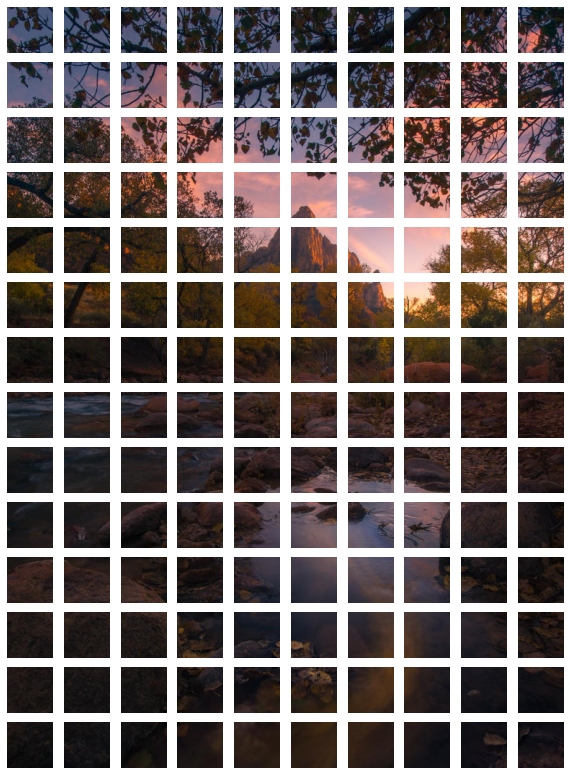

In [58]:
imgs, r, c = break64(files[0])

displayImage(files[0], imgs)

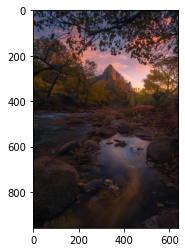

In [36]:
im = Image.open(files[0]).convert('RGB')
plt.imshow(im)